<a href="https://colab.research.google.com/github/phudo0605/AI/blob/main/HW3/problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Phu Do.
The following algorithm is to discover potentially missing immediate connections in a network of friends.

In [ ]:
from collections import deque

# Start the graph search from root (person whose friends we are looking for) using a doubly-ended queue
def PotentialFriends(graph, root):
    queue = deque([root])

    # set a dict of friendlevels, start with root at level 0
    friendlevels = {root: 0}

    # Check the connections from root go down 2 levels
    # make 2 list of friends (nodes) at level 1 & 2.
    # which means that root and friends in level 2 have connections
    # through the same intermediate friend (in level 1)
    # this intermediate friend can introduce root and friends in level 2
    # to help them make friendship
    friends_level1 = list()
    friends_level2 = list()
    potential_friends = dict()

    # start BFS to trace from the root down to all friend levels
    # Keep exploring as long as the queue is not empty
    while queue:
        # Dequeue a vertex from queue
        vertex = queue.popleft()

        # set the same new friend level for all neighbors of a vertex, and enqueue them
        for neighbor in graph[vertex]:
            if neighbor in friendlevels:
                continue
            queue.append(neighbor)
            friendlevels[neighbor] = friendlevels[vertex] + 1

    # return list of friends at level 1 & 2 from root
    for x, y in friendlevels.items():
        if y == 1:
            friends_level1.append(x)
        if y == 2:
            friends_level2.append(x)

    # print out the friend level list if you want
    # print(friends_level1)
    # print(friends_level2)

    # Rearrange the relationship in potential_friend dictionary
    for i in friends_level1:
        for neighbor in graph[i]:
            if neighbor in friends_level2:
                potential_friends.update({neighbor:i})
    print(f'Summary of possible friendship connection of {root}')
    print(potential_friends)

    # Make all relationship in details
    newdict = dict()
    for k, v in potential_friends.items():
        newdict.setdefault(v, []).append(k)
    print('\nExplain possible friendship:')
    for k,v in newdict.items():
        print(f'{root} is potential friend with {v} through intermediate of {k}')


Graph1

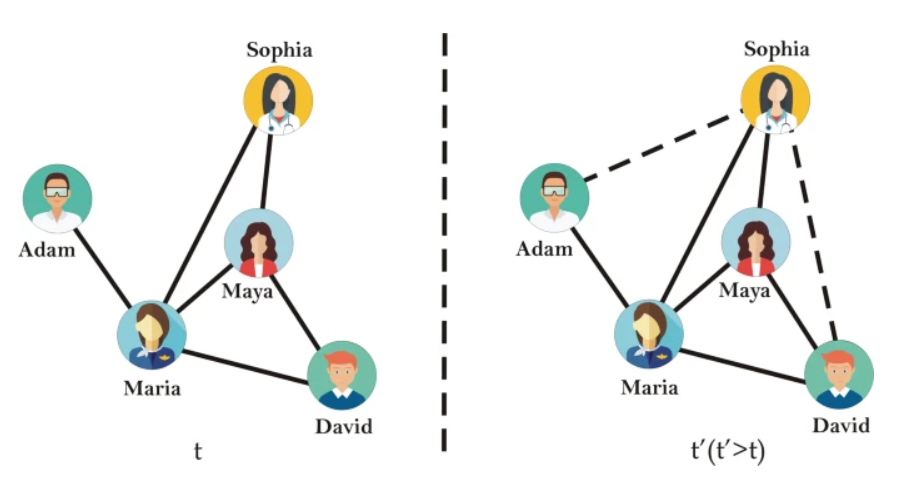

In [ ]:
# Represent the graph using an adjacency list

graph1 = {
  'Maria': ['Adam','David','Maya','Sophia'],
  'Adam': ['Maria'],
  'David': ['Maria','Maya'],
  'Maya': ['David', 'Maria','Sophia'],
  'Sophia': ['Maria', 'Maya'],
}

# Run the algorithm to check result
PotentialFriends(graph1, 'David')

Summary of possible friendship connection of David
{'Adam': 'Maria', 'Sophia': 'Maya'}

Explain possible friendship:
David is potential friend with ['Adam'] through intermediate of Maria
David is potential friend with ['Sophia'] through intermediate of Maya


Graph2

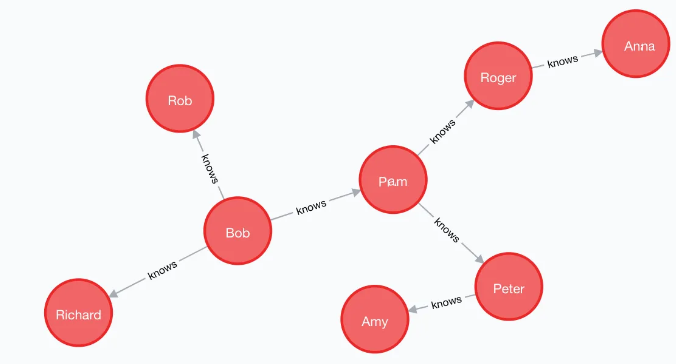

In [ ]:
graph2 = {
  'Bob' : ['Pam','Rob', 'Richard'],
  'Pam' : ['Peter', 'Roger', 'Bob'],
  'Rob' : ['Bob'],
  'Richard' : ['Bob'],
  'Peter' : ['Army', 'Pam'],
  'Roger' : ['Anna', 'Pam'],
  'Army' : ['Peter'],
  'Anna' : ['Roger'],
}
# Run the algorithm to check result
PotentialFriends(graph2, 'Pam')

['Peter', 'Roger', 'Bob']
['Army', 'Anna', 'Rob', 'Richard']
Summary of possible friendship connection of Pam
{'Army': 'Peter', 'Anna': 'Roger', 'Rob': 'Bob', 'Richard': 'Bob'}

Explain possible friendship:
Pam is potential friend with ['Army'] through intermediate of Peter
Pam is potential friend with ['Anna'] through intermediate of Roger
Pam is potential friend with ['Rob', 'Richard'] through intermediate of Bob
